# Assignment 1

Name        : Chia Sin Liew   
Last edited : February 21st, 2022 

The goal of this assignment is to study the K-Nearest Neighbors(K-N) classifier model.

- **Part A**: Model optimization via feature selection & varying threshold
- **Part B**: Understanding the curse of dimensionality & the fundamental limitation of the K-NN model

## Part A: Classification of Structured Data

You will create a K-NN classifier (using Scikit-Learn) to perform binary classification on the following structured dataset.

### **Dataset**:
The *KNNDataset.csv* has 250 samples & 300 features.

  - Feature columns: column '0' to column '299'.
  - Target column: column 'target'.


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from collections import defaultdict
from scipy import stats

### **Pre-Processing**:

- Load the CSV file as a Pandas DataFrame object


In [2]:
df = pd.read_csv("KNNDataset.csv")
df

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,1,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,246,0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,247,0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,248,1,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


  - Create a data frame object for the features and another data frame object for the target

In [3]:
# Y for target
Y = df.target.to_frame()
# X for features
X = df.drop(columns=["id", "target"])

print("\nData frame for features(X): \n", X.iloc[:6, :6])
print("\nDimension of X: ", X.shape)
print("\nData frame for target(Y): \n", Y)
print("\nDimension of Y: ", Y.shape)


Data frame for features(X): 
        0      1      2      3      4      5
0 -1.067 -1.114 -0.616  0.376  1.090  0.467
1 -0.831  0.271  1.716  1.096  1.731 -0.197
2  0.099  1.390 -0.732 -1.065  0.005 -0.081
3 -0.989 -0.916 -1.343  0.145  0.543  0.636
4  0.811 -1.509  0.522 -0.360 -0.220 -0.959
5  0.739  0.211 -0.836 -1.430 -0.291 -0.989

Dimension of X:  (250, 300)

Data frame for target(Y): 
      target
0         1
1         0
2         0
3         1
4         0
..      ...
245       1
246       0
247       0
248       1
249       0

[250 rows x 1 columns]

Dimension of Y:  (250, 1)


- Convert the above two data frame objects into two NumPy arrays (you may use te NumPy "asarray" function).

In [4]:
X = np.asarray(X)
print(X.shape)
X

(250, 300)


array([[-1.067, -1.114, -0.616, ...,  0.436,  0.958, -0.824],
       [-0.831,  0.271,  1.716, ..., -0.029, -1.932, -0.343],
       [ 0.099,  1.39 , -0.732, ..., -0.148, -0.646,  0.725],
       ...,
       [-2.327, -1.834, -0.762, ...,  0.676, -1.22 , -0.855],
       [-0.451, -0.204, -0.762, ..., -2.117, -0.546, -0.093],
       [ 0.725,  1.064,  1.333, ..., -1.69 , -0.198,  0.643]])

In [5]:
Y = np.asarray(Y).ravel()
print(Y.shape)
Y

(250,)


array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

- Convert the target array type into "int"

In [6]:
print("X data type: ", X.dtype)
print("Y data type: ", Y.dtype)

Y = Y.astype(int)
print("\nY data type after conversion: ", Y.dtype)

X data type:  float64
Y data type:  int64

Y data type after conversion:  int64


- Partition the dataset into training & test subsets: 80% training & 20% test(you may use Scikit_learn's train_test_split() function)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 300)
(50, 300)
(200,)
(50,)


### **Experiments**:
Perform binary classification using K-NN models for the following experiments. 

Do hyperparameter tuning to determine optimal values for the following hyperparameters: <span style="color:red">*n_neighbors*</span>, <span style="color:red">*p*</span>, and <span style="color:red">*weights*</span>.

In [8]:
# Create a dictionary to store results for experiments
exp_res_list = defaultdict(dict)

- **Experiment 1)** All features & no standardization. Report train accuracy, test accuracy, and test confusion matrix.

#### **Hyperparameter tuning**

In [9]:
%%time

### Do hyperparameter tuning using cross-validation

warnings.filterwarnings('ignore')

# define param_grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50),
              'p': [1, 2, 10, 50, 100, 500, 1000],
              'weights': ['uniform', 'distance']}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_
exp_res_list["exp1"].update(params_optimal_knn)

print("Best Score: ", knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score:  0.31905723905723904
Optimal Hyperparameter Values:  {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


CPU times: user 2.26 s, sys: 409 ms, total: 2.67 s
Wall time: 25.8 s


#### Train model and compute performance metrics

In [10]:
# create best model using the optimal hyperparameter values

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

# alternatively, use the optimal knn model from above for prediction, 
# yield same accuracy
# y_train_predicted = knn_cv.predict(X_train)


# calculate:
#   - training accuracy
train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)
exp_res_list["exp1"]["training_accuracy"] = train_accuracy_knn

#   - test accuracy
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)
exp_res_list["exp1"]["test_accuracy"] = test_accuracy_knn

#   - test confusion matrix
# first calculate the no. of correct prediction
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct prediction (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))
exp_res_list["exp1"]["test_no_correct"] = np.sum(y_test_predicted == y_test)

# then calculate confusion matrix
print("\nConfusion Matrix (Test):\n", confusion_matrix(y_test, y_test_predicted))


Training Accuracy:  1.0

Test Accuracy:  0.66

No. of correct prediction (Test): 33/50

Confusion Matrix (Test):
 [[30 10]
 [ 7  3]]


- **Experiment 2)** All features & standardization. Report train accuracy, test accuracy, and test confusion matrix.

#### Standardize the data

In [11]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### **Hyperparameter tuning**

In [12]:
%%time

### Do hyperparameter tuning using cross-validation

warnings.filterwarnings('ignore')

# define param_grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50),
              'p': [1, 2, 10, 50, 100, 500, 1000],
              'weights': ['uniform', 'distance']}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_
exp_res_list["exp2"].update(params_optimal_knn)

print("Best Score: ", knn_cv.best_score_)
print("Optimal Hyperparameter Values (Standardized data): ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score:  0.3522590790702246
Optimal Hyperparameter Values (Standardized data):  {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}


CPU times: user 1.65 s, sys: 234 ms, total: 1.89 s
Wall time: 24.8 s


#### Train model and compute performance metrics

In [13]:
# create best model using the optimal hyperparameter values

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

# alternatively, use the optimal knn model from above for prediction, 
# yield same accuracy
# y_train_predicted = knn_cv.predict(X_train)


# calculate:
#   - training accuracy
train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy (Standardized data): ", train_accuracy_knn)
exp_res_list["exp2"]["training_accuracy"] = train_accuracy_knn

#   - test accuracy
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy (Standardized data): ", test_accuracy_knn)
exp_res_list["exp2"]["test_accuracy"] = test_accuracy_knn

#   - test confusion matrix
# first calculate the no. of correct prediction
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct prediction (Test - Standardized data): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))
exp_res_list["exp2"]["test_no_correct"] = np.sum(y_test_predicted == y_test)

# then calculate confusion matrix
print("\nConfusion Matrix (Test - Standardized data):\n", confusion_matrix(y_test, y_test_predicted))


Training Accuracy (Standardized data):  1.0

Test Accuracy (Standardized data):  0.74

No. of correct prediction (Test - Standardized data): 37/50

Confusion Matrix (Test - Standardized data):
 [[36  4]
 [ 9  1]]


In [14]:
exp_res_list

defaultdict(dict,
            {'exp1': {'n_neighbors': 1,
              'p': 2,
              'weights': 'uniform',
              'training_accuracy': 1.0,
              'test_accuracy': 0.66,
              'test_no_correct': 33},
             'exp2': {'n_neighbors': 4,
              'p': 2,
              'weights': 'distance',
              'training_accuracy': 1.0,
              'test_accuracy': 0.74,
              'test_no_correct': 37}})

- **Experiment 3)** A subset of the features & standardization. Report train accuracy, test accuracy, test precision, test recall, test F1 score, and test confusion matrix.

    * (Dr. Hasan's note:) You may use Pearson's correlation coefficient to select features. However, it's up to you to decide the threshold for feature selection. Your goal would be to increase the test accuracy. You are free to try any combinations of the features. 

#### **Calculate Pearson's correlation and subset features**

In [15]:
corr_threshold = 0.15

# Get values of Pearson correlation coefficient
feature_corr = df.corr()['target'].sort_values(ascending=False)
print(feature_corr.to_string())


target    1.000000
127       0.337540
18        0.206452
241       0.173879
3         0.153317
66        0.140056
93        0.136455
260       0.134119
213       0.121495
167       0.121217
175       0.120121
261       0.118305
278       0.118187
211       0.116670
151       0.110165
178       0.108901
169       0.106084
208       0.103583
196       0.101347
183       0.098502
160       0.092978
6         0.090943
79        0.090335
96        0.090275
32        0.088310
107       0.087064
237       0.086818
212       0.086428
218       0.085592
10        0.084763
39        0.082893
119       0.080552
247       0.080201
106       0.078429
4         0.077830
288       0.076556
25        0.073828
180       0.072806
281       0.071828
57        0.070536
103       0.069955
55        0.068370
115       0.067714
85        0.066308
217       0.065218
163       0.064434
26        0.064222
34        0.061221
235       0.059790
81        0.059440
13        0.057648
60        0.057102
98        0.

In [16]:
# Get features above the selected threshold
feature_corr[feature_corr.abs() >= corr_threshold]

target    1.000000
127       0.337540
18        0.206452
241       0.173879
3         0.153317
74       -0.157756
69       -0.164571
126      -0.167064
16       -0.179796
135      -0.179960
59       -0.203166
176      -0.217100
Name: target, dtype: float64

In [17]:
# filter by threshold and drop highly correlated features
retained_features = feature_corr[feature_corr.abs() >= corr_threshold].drop(labels=['69', '16'])

# Subset columns/features
df_sub = df.loc[:, retained_features.index.to_list()]
df_sub

,target,127,18,241,3,74,126,135,59,176
0,1,1.573,-0.502,0.513,0.376,0.847,1.494,-0.230,-1.370,-0.608
1,0,1.290,-1.490,0.962,1.096,0.416,0.336,-0.614,3.080,1.068
2,0,0.016,0.508,1.004,-1.065,-0.978,0.649,-0.312,0.693,1.999
3,1,0.816,-0.943,-1.140,0.145,-1.822,-0.723,1.261,-1.248,-2.854
4,0,-0.815,0.402,-1.009,-0.360,1.730,-0.763,0.462,-0.414,1.524
...,...,...,...,...,...,...,...,...,...,...
245,1,0.124,-0.367,-0.846,0.610,-0.947,-0.351,0.036,1.802,-0.249
246,0,-2.212,-0.598,-0.773,-0.408,-0.577,0.446,-0.310,0.080,0.914
247,0,0.053,-0.502,-0.771,0.660,-0.947,1.846,-0.825,0.594,0.403
248,1,-0.542,-0.446,0.155,0.261,-0.102,0.612,-0.620,0.428,1.986


#### **Preparing the feature and target arrays**

In [18]:
# Y for target
y = df_sub.target.to_frame()
# X for features
X = df_sub.drop(columns=["target"])

print("\nData frame for features(X): \n", X.iloc[:6, :6])
print("\nDimension of X: ", X.shape)
print("\nData frame for target(Y): \n", y)
print("\nDimension of Y: ", y.shape)

# convert into np arrays
X = np.asarray(X)
y = np.asarray(y).ravel()

# check to make sure y is "int"
print("X data type: ", X.dtype)
print("Y data type: ", y.dtype)
y = y.astype(int)


Data frame for features(X): 
      127     18    241      3     74    126
0  1.573 -0.502  0.513  0.376  0.847  1.494
1  1.290 -1.490  0.962  1.096  0.416  0.336
2  0.016  0.508  1.004 -1.065 -0.978  0.649
3  0.816 -0.943 -1.140  0.145 -1.822 -0.723
4 -0.815  0.402 -1.009 -0.360  1.730 -0.763
5 -0.507 -0.876 -1.108 -1.430 -0.017 -0.233

Dimension of X:  (250, 9)

Data frame for target(Y): 
      target
0         1
1         0
2         0
3         1
4         0
..      ...
245       1
246       0
247       0
248       1
249       0

[250 rows x 1 columns]

Dimension of Y:  (250, 1)
X data type:  float64
Y data type:  int64


#### **Create training and test datasets**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 9)
(50, 9)
(200,)
(50,)


#### Standardize the data

In [50]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### **Hyperparameter tuning**

In [51]:
%%time

### Do hyperparameter tuning using cross-validation

warnings.filterwarnings('ignore')

# define param_grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50),
              'p': [1, 2, 10, 50, 100, 500, 1000],
              'weights': ['uniform', 'distance']}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_
exp_res_list["exp3"].update(params_optimal_knn)

print("Best Score: ", knn_cv.best_score_)
print("Optimal Hyperparameter Values (Data subset): ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 686 candidates, totalling 3430 fits
Best Score:  0.46526315789473677
Optimal Hyperparameter Values (Data subset):  {'n_neighbors': 10, 'p': 1000, 'weights': 'distance'}


CPU times: user 679 ms, sys: 30.8 ms, total: 710 ms
Wall time: 2.09 s


#### Train model and compute performance metrics

In [52]:
# create best model using the optimal hyperparameter values

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

# alternatively, use the optimal knn model from above for prediction, 
# yield same accuracy
# y_train_predicted = knn_cv.predict(X_train)


# calculate:
#   - training accuracy
train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy (Data subset): ", train_accuracy_knn)
exp_res_list["exp3"]["training_accuracy"] = train_accuracy_knn

#   - test accuracy
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy (Data subset): ", test_accuracy_knn)
exp_res_list["exp3"]["test_accuracy"] = test_accuracy_knn

#   - test confusion matrix
# first calculate the no. of correct prediction
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct prediction (Test - Data subset): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))
exp_res_list["exp3"]["test_no_correct"] = np.sum(y_test_predicted == y_test)

# then calculate confusion matrix
print("\nConfusion Matrix (Test - Data subset):\n", confusion_matrix(y_test, y_test_predicted))

#   - test precision
test_precision = precision_score(y_test, y_test_predicted)
print("\nPrecision (Test - Data subset): %f" % test_precision)
exp_res_list["exp3"]["precision"] = test_precision

#   - test recall
test_recall = recall_score(y_test, y_test_predicted)
print("\nRecall (Test - Data subset): %f" % test_recall)
exp_res_list["exp3"]["recall"] = test_recall

#   - test F1 score
test_f1 = f1_score(y_test, y_test_predicted)
print("\nF1 Score (Test - Data subset): %f" % test_f1)
exp_res_list["exp3"]["f1_score"] = test_f1


Training Accuracy (Data subset):  1.0

Test Accuracy (Data subset):  0.76

No. of correct prediction (Test - Data subset): 38/50

Confusion Matrix (Test - Data subset):
 [[37  3]
 [ 9  1]]

Precision (Test - Data subset): 0.250000

Recall (Test - Data subset): 0.100000

F1 Score (Test - Data subset): 0.142857


- **Experiment 4)** Generate the ROC curve and the Precision-Recall Curve for the model of experiment 3. Find the optimal threshold. Using the optimal threshold, compute train accuracy, test accuracy, test precision, test recall, test F1 score, and test confusion matrix.

#### Generate ROC curve

In [54]:
# Calculate the probabilities of positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]

# Get FPR, TPR to plot ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR & TPR for various threshold values: \n ")
print("\nFPR: ", fpr)
print("\nTPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR & TPR for various threshold values: 
 

FPR:  [0.         0.         0.         0.00699301 0.00699301 0.01398601
 0.01398601 0.02097902 0.02097902 0.02797203 0.02797203 0.03496503
 0.03496503 0.07692308 0.07692308 0.08391608 0.08391608 0.11188811
 0.11188811 0.17482517 0.17482517 0.18181818 0.18181818 0.22377622
 0.22377622 0.25874126 0.25874126 0.28671329 0.28671329 0.35664336
 0.35664336 0.36363636 0.36363636 0.37062937 0.37062937 0.43356643
 0.43356643 0.48951049 0.48951049 0.5034965  0.5034965  0.51048951
 0.51048951 0.58741259 0.58741259 0.62937063 0.62937063 0.72027972
 0.72027972 0.72727273 0.72727273 0.74825175 0.74825175 0.75524476
 0.75524476 0.82517483 0.82517483 0.85314685 0.85314685 1.        ]

TPR:  [0.         0.01754386 0.07017544 0.07017544 0.1754386  0.1754386
 0.21052632 0.21052632 0.29824561 0.29824561 0.31578947 0.31578947
 0.35087719 0.35087719 0.36842105 0.36842105 0.42105263 0.42105263
 0.43859649 0.43859649 0.45614035 0.45614035 0.49122807 0.49122807
 0.5

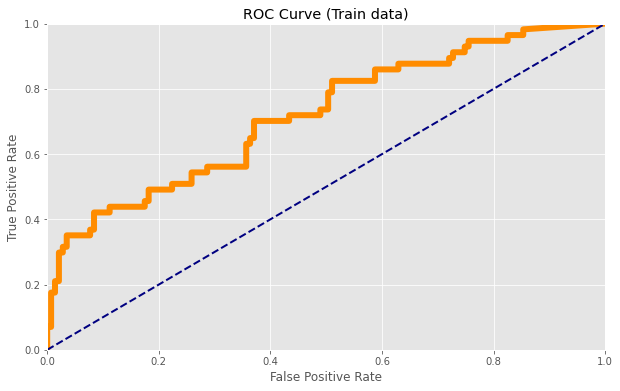

In [55]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, color="darkorange", linewidth=6, label=label)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.axis([0, 1, 0, 1])
    plt.title(label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr, "ROC Curve (Train data)")
plt.show()

In [56]:
# Area under the ROC curve
roc_auc_score(y_train, y_scores)

0.7193595877806405

#### Precision-Recall Curve

In [57]:
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

# Get Precision, Recall to plot Precision-Reall Curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

print("\nPrecisions & Recalls for various threshold values: \n")
print("\nPrecisions: ", precisions)
print("\nRecalls: ", recalls)
print("\nThresholds: ", thresholds)


Precisions & Recalls for various threshold values: 


Precisions:  [0.285      0.31609195 0.31791908 0.31976744 0.32163743 0.32352941
 0.32544379 0.32738095 0.32335329 0.3253012  0.32727273 0.32926829
 0.33128834 0.33333333 0.33540373 0.3375     0.33962264 0.34177215
 0.34394904 0.34615385 0.3483871  0.35064935 0.35294118 0.34868421
 0.35099338 0.34666667 0.34899329 0.34459459 0.34693878 0.34931507
 0.34482759 0.34027778 0.34265734 0.34507042 0.34751773 0.35
 0.35251799 0.35507246 0.35036496 0.35294118 0.35555556 0.35820896
 0.36090226 0.36363636 0.36641221 0.36923077 0.37209302 0.375
 0.37795276 0.38095238 0.384      0.38709677 0.38211382 0.37704918
 0.38016529 0.38333333 0.38655462 0.38983051 0.39316239 0.39655172
 0.4        0.40350877 0.39823009 0.40178571 0.40540541 0.40909091
 0.41284404 0.40740741 0.41121495 0.41509434 0.41904762 0.41346154
 0.41747573 0.41176471 0.41584158 0.42       0.41414141 0.41836735
 0.41237113 0.41666667 0.42105263 0.42553191 0.43010753 0.43478261
 0.43

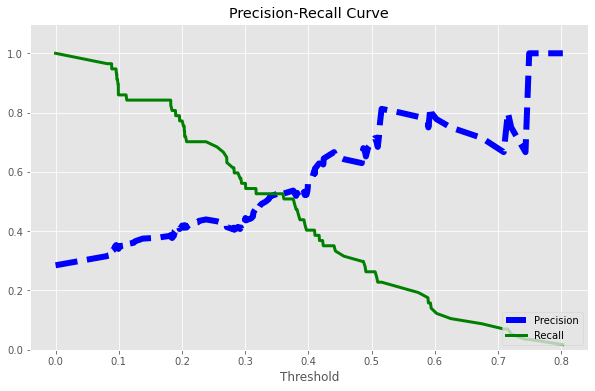


Optimal Threshold:  0.3514298887899685

Optimal Threshold (approx., second try):  0.3514298887899685


In [58]:
fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", linewidth=6, label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", linewidth=3, label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# find optimal threshold
threshold_optimal = -1
for i in range(len(precisions)):
    if(round(precisions[i], 2) == round(recalls[i], 2)):
        threshold_optimal = thresholds[i]

print("\nOptimal Threshold: ", threshold_optimal)

# There is no similar threshold for the arrays of precisions & recalls
#  -> approximate by calculating the threshold with the smallest difference between precisions & recall
optimal_threshold = sorted(list(zip(np.abs(precisions - recalls), thresholds)), key=lambda i: i[0], reverse=False)[0][1]

print("\nOptimal Threshold (approx., second try): ", optimal_threshold)

#### After thresholding

In [59]:
# Optimal threshold from precision-recall curve 
t = optimal_threshold if threshold_optimal == -1 else threshold_optimal

print("\nThe optimal threshold used is: ", t)

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class

# training dataset
y_train_predicted_new = (cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1] > t).astype(int)

# test dataset
y_test_predicted_new = (cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1] > t).astype(int)



print("\nPerformance Measures Using Optimal Threshold from Precision-Recall Curve: ")
# calculate:
#   - training accuracy
train_accuracy_knn_thres = np.mean(y_train_predicted_new == y_train)
print("\nTraining Accuracy (Data subset - After thresholding %.2f): %f "% (t, train_accuracy_knn_thres))
exp_res_list["exp4"]["training_accuracy"] = train_accuracy_knn_thres

#   - test accuracy
test_accuracy_knn_thres = np.mean(y_test == y_test_predicted_new)
print("\nTest Accuracy (Data subset - After thresholding %.2f): %f " % (t, test_accuracy_knn_thres))
exp_res_list["exp4"]["test_accuracy"] = test_accuracy_knn_thres

#   - test confusion matrix
print("\nTest Confusion Matrix (Data subset - After thresholding %.2f):\n" % t)
print(confusion_matrix(y_test, y_test_predicted_new))

#   - test precision
test_precision_thres = precision_score(y_test, y_test_predicted_new)
print("\nTest Precision (Data subset - After thresholding %.2f): %f" % (t, test_precision_thres))
exp_res_list["exp4"]["precision"] = test_precision_thres

#   - test recall
test_recall_thres = recall_score(y_test, y_test_predicted_new)
print("\nTest Recall (Data subset - After thresholding %.2f): %f" % (t, test_recall_thres))
exp_res_list["exp4"]["recall"] = test_recall_thres

#   - test F1 score
test_f1_thres = f1_score(y_test, y_test_predicted_new)
print("\nTest F1 Score (Data subset - After thresholding %.2f): %f" % (t, test_f1_thres))
exp_res_list["exp4"]["f1_score"] = test_f1_thres


The optimal threshold used is:  0.3514298887899685

Performance Measures Using Optimal Threshold from Precision-Recall Curve: 

Training Accuracy (Data subset - After thresholding 0.35): 0.735000 

Test Accuracy (Data subset - After thresholding 0.35): 0.840000 

Test Confusion Matrix (Data subset - After thresholding 0.35):

[[38  2]
 [ 6  4]]

Test Precision (Data subset - After thresholding 0.35): 0.666667

Test Recall (Data subset - After thresholding 0.35): 0.400000

Test F1 Score (Data subset - After thresholding 0.35): 0.500000


In [60]:
exp_res_list

defaultdict(dict,
            {'exp1': {'n_neighbors': 1,
              'p': 2,
              'weights': 'uniform',
              'training_accuracy': 1.0,
              'test_accuracy': 0.66,
              'test_no_correct': 33},
             'exp2': {'n_neighbors': 4,
              'p': 2,
              'weights': 'distance',
              'training_accuracy': 1.0,
              'test_accuracy': 0.74,
              'test_no_correct': 37},
             'exp3': {'n_neighbors': 10,
              'p': 1000,
              'weights': 'distance',
              'training_accuracy': 1.0,
              'test_accuracy': 0.76,
              'test_no_correct': 38,
              'precision': 0.25,
              'recall': 0.1,
              'f1_score': 0.14285714285714288},
             'exp4': {'training_accuracy': 0.735,
              'test_accuracy': 0.84,
              'precision': 0.6666666666666666,
              'recall': 0.4,
              'f1_score': 0.5}})

In [61]:
# Experiments 1-4 at a glance
pd.DataFrame.from_dict(exp_res_list, orient="index")

,n_neighbors,p,weights,training_accuracy,test_accuracy,test_no_correct,precision,recall,f1_score
exp1,1.0,2.0,uniform,1.000,0.66,33.0,NaN,NaN,NaN
exp2,4.0,2.0,distance,1.000,0.74,37.0,NaN,NaN,NaN
exp3,10.0,1000.0,distance,1.000,0.76,38.0,0.250000,0.1,0.142857
exp4,NaN,NaN,NaN,0.735,0.84,NaN,0.666667,0.4,0.500000


#### Question 1:
Which experiment has the highest test accuracy between experiment 1 and
2? **Why**?

**Ans**: Experiment 2 has higher test accuracy than Experiment 1. Experiment 2 was standardized to standard Gaussian distribution with a mean of 0 and a standard deviation of 1. This takes care of the uneven variance and the possible large variation in the scale (unit) across dimensions.